# Regression Analysis

In this notebook:
1. **Linear Regression**: Simple and Multiple Regression, Assumptions, Interpretation of Coefficients
2. **Logistic Regression**: Binary classification, Log-Odds, Interpretation
3. **Polynomial Regression**: Fitting non-linear data with polynomial terms
4. **Ridge and Lasso Regression**: Regularization techniques to prevent overfitting
5. **Bias-Variance Tradeoff**: Understanding the balance between model complexity and prediction accuracy

`pip install numpy pandas scikit-learn statsmodels seaborn`

## 1. Linear Regression

### 1.1 Simple and Multiple Regression

**Key Concepts**:
- **Simple Linear Regression**: involves predicting a dependent variable $y$ based on one independent variable $X$. 
  - The relationship is modeled as $y = β_{0} + β_{1} X + ϵ$
- **Multiple Linear Regression**: extends this by using multiple predictors (independent variables).
  - The relationship is modeled as $y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + ... + \beta_{n} X_{n} + ϵ$
- **Linearity**: The relationship between the predictors and response is linear.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** Constant variance of errors.
- **Normality of Residuals:** Errors are normally ditributed.

**Interpretation of Coefficients:**
- In simple regression, $\beta_{1}$ indicates how much $y$ changes witha one-unit change in $X$.
- In multiple regression, each $\beta_{i}$ represents the change in $y$ with a one-unit change in $X_{i}$, holding other variables contant.

**Real-World Example:**

- **Simple regression**: Predicting house prices based on square footage
- **Multiple regression**: Predicting house prices based on multiple features such as size, location, and number of rooms

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Generate a dataset for testing

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generating features for regression
house_size = np.random.normal(1500, 300, n_samples)  # House size in square feet
location = np.random.randint(1, 5, n_samples)        # Location encoded as 1 to 4 (for simplicity)
rooms = np.random.randint(2, 6, n_samples)           # Number of rooms
income = np.random.normal(70000, 15000, n_samples)   # Annual income for logistic regression
age = np.random.randint(20, 65, n_samples)           # Age of buyer

# House prices as a function of size, location, and rooms (add noise)
price = (house_size * 200) + (location * 10000) + (rooms * 5000) + np.random.normal(0, 50000, n_samples)

# Binary purchase decision based on income and age for logistic regression
purchase_prob = 1 / (1 + np.exp(-0.00005 * (income - 50000) + 0.1 * (age - 40)))  # Sigmoid function
purchase = np.random.binomial(1, purchase_prob)

# Creating the DataFrame
df = pd.DataFrame({
    'size': house_size,
    'location': location,
    'rooms': rooms,
    'price': price,
    'income': income,
    'age': age,
    'purchase': purchase
})

# Display the first few rows
df.head()

,size,location,rooms,price,income,age,purchase
0,1649.014246,1,5,455486.177975,70195.028378,43,0
1,1458.520710,2,2,341933.286686,91803.011157,35,0
2,1694.306561,1,2,363364.941635,66030.147501,21,1
3,1956.908957,1,3,420518.313175,110802.537499,47,1
4,1429.753988,3,4,323029.910726,79385.010216,51,1


### Simple Linear

In [2]:
# Train the Linear Regression Model

X = df[['size']] # Predictor
y = df['price']
model = LinearRegression().fit(X, y)
print(f'Simple Regression Coeffiecient: {round(model.coef_[0],3)}')

Simple Regression Coeffiecient: 210.912


**Results Explained**

For every unit of size increased the price raises by $210.91.

### Multi Linear

In [3]:
# Multiple Linear Regression (size, location, rooms vs. price)

X_multi = df[['size', 'location', 'rooms']]
X_multi = sm.add_constant(X_multi)
# Ordinary Least Squares
model_multi = sm.OLS(y, X_multi).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     44.46
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.22e-18
Time:                        01:13:08   Log-Likelihood:                -1224.2
No. Observations:                 100   AIC:                             2456.
Df Residuals:                      96   BIC:                             2467.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.132e+04   3.52e+04     -0.890      0.3

### Results Explained:

**Model Overview**:
- **Dependent Variable (Target)**: `price` — This is the outcome you're trying to predict
- **R-squared**: `0.581` — This means that about **`58.1%`** of the variability in `price` is explained by the model, which is decent but not perfect. It suggests there are other factores influencing the price that are not in your model.
- **Adjusted R-squared**: `0.568` — This is slightly lower value (56.8%) since it accounts for the number of predictors (features) in your model. It prevents overestimation of fit when adding more variables.
- **F-statistic**: `44.46` (with a **p-value** of **4.22e-18**) — This shows that your overall model is tatistically signigicant. In other words, the features (size, location rooms) tohether are meaningfully related to `price`.

**Interpreting the Coefficients:**

- **Intercept (const):** `-31,320` — This would be the predicted price price if all features price if all features (size, location, rooms) were zero. While this isn't realistic in this case, it's the baseline value.
- **Size:** `210.56` — For every additional square unit (e.g., square foot) of size, the price is predicted to invrease by `$210.56`, holding other factors constant. Since the **p-value** here is **0.000**, this is highly significant — meaning that size is an important predictor of price.
- **Location:** `11,690` — Being in a better location (measured however you defined it) increases the price by about `$11,690` on average. The **p-value** is `0.011`, which shows that location is also a statistically significant predictor. 
- **Rooms:** `6343.89` — Adding one more room increases the predicted prcie by around `$6,343.89`. However, the **p-value** here is `0.155`, meaning this effect is not statistically significant. This suggests that the number of rooms may not have a strong inpact on price in this model.

**Other Important Indicators:**

- **Prob (Omnibus) and Proj (JB):** These values (`0.286` and `0.383`) suggest that the residual (errors) from your model seem to be normally distributed, which is good.
- **Durbin-Watson:** `1.881` — This value is close to 2, meaning there is likely no significant autocorrelation in the residuals (i.e., no pattern in the errors).
- **Condition Number:** `1.03e+04` — This is high, indicating potential multicollinearity, meaning some of your predictors (like site, location and rooms) may be correlated with each other, which can affect the reliability of the coefficient estimates.

### Visual Plot

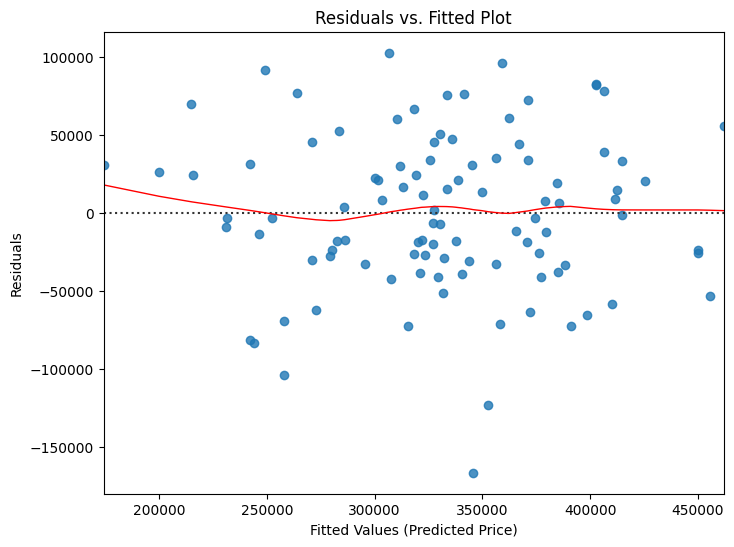

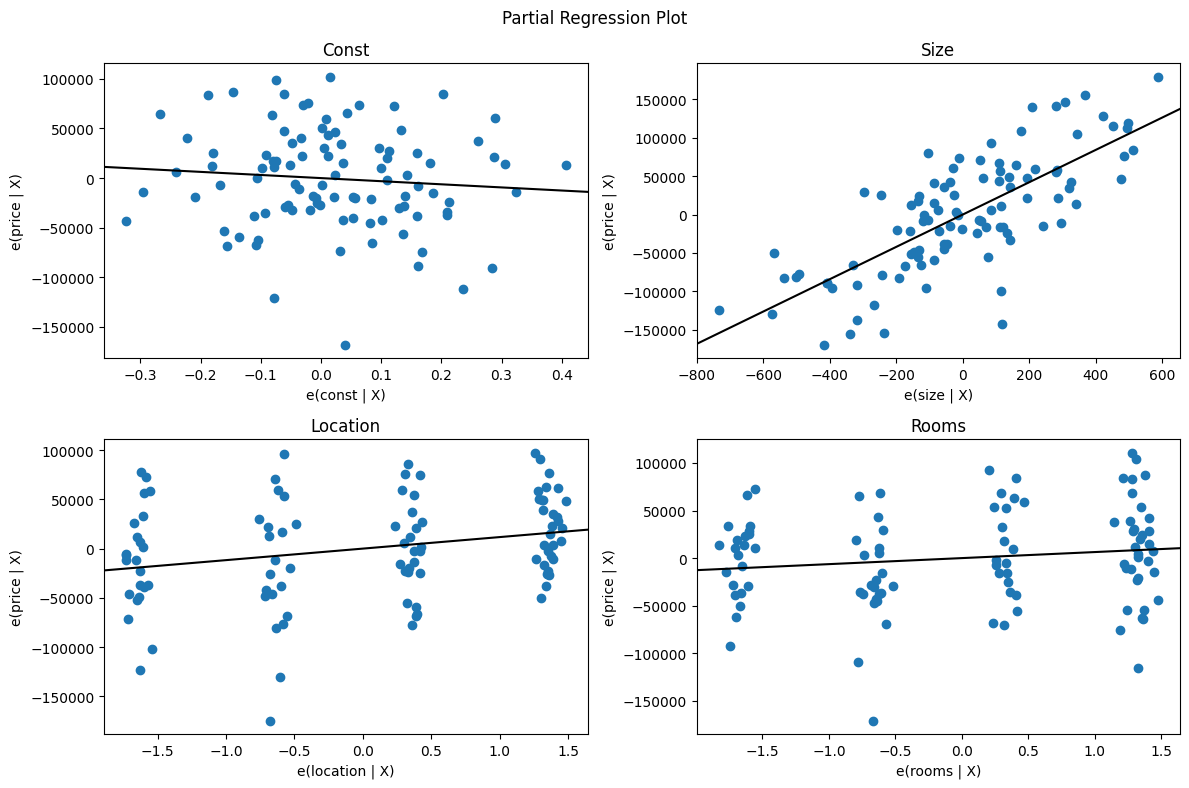

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

y_pred = model_multi.fittedvalues
residuals = model_multi.resid

plt.figure(figsize=(8,6))
sns.residplot(
    x=y_pred,
    y=residuals,
    lowess=True,
    line_kws={'color': 'red', 'lw':1}
)
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Plot')
plt.show()

fig = plt.figure(figsize= (12,8))
plot = sm.graphics.plot_partregress_grid(model_multi, fig=fig)

predictors = ['Const', 'Size', 'Location', 'Rooms']
for i, ax in enumerate(fig.axes):
    ax.set_title(f'{predictors[i]}')

plt.tight_layout()
plt.show()

**Explanation:**

1. **Residuals vs. Fitted Plot:**
   - This plot shows how the residuals (errors) are distributed relative to the fitted values (predicted price).
   - Ideally, you want the residuals to be randomly scattered around 0, with no clear pattern. This would indicate that your model fits the data well.
   - The red line is a Lowess (Locally Weighted Scatterplot Smoothing) line.
     - This line provides a smoothed trend of the relationship between the fitted values (predicted prices) and the residuals (errors).

2. **Partial Regression Plots:**
   - These plots show the effect of each independent variable (`size`, `location`, `rooms`) on the dependet variable (`price`) while controlling for the other variables.

## 1.2 Logistic Regression

**Key concepts:**

Used for binary classification problems where the outcome variable is categorical (0/1, True/False). Instead of modeling the response directly, logistic regression models the **log-odds:** 
- $log(\frac{p}{1-p}) = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$

**Interpretation:**
- **Odds:** The probability of success over failure, $\frac{p}{1-p}$
- **Coefficients:** Represent the change in log-odds for a one-unit increase in the predictor. For a positive coefficient, the odds of the event increase; for a negative coefficient, they decrease.

**Real-World Example:**

Predicting whether a customer will buy a product (1: Yes, 0:No) based on their income and age.



In [5]:
df.head()

,size,location,rooms,price,income,age,purchase
0,1649.014246,1,5,455486.177975,70195.028378,43,0
1,1458.520710,2,2,341933.286686,91803.011157,35,0
2,1694.306561,1,2,363364.941635,66030.147501,21,1
3,1956.908957,1,3,420518.313175,110802.537499,47,1
4,1429.753988,3,4,323029.910726,79385.010216,51,1


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['income', 'age']]
y = df['purchase'] # Binary target (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regression Coefficients: {log_model.coef_}')

Logistic Regression Coefficients: [[ 4.98148658e-05 -1.45536075e-01]]


### Results Explained

**Interpretation:**
- `4.98148658e-05`: This is the coefficient for the `income` feature
- `-1.45536075e-01`: This is the coefficient for the `age` feature.

- **Income:** A very smal positive coefficient (~0.00005) indicates that income has a very weak positive relationship with the likelihood of making a purchase.
  - For every unit increase in income, the log-odds of purchasing increase slightly, but the impact is negligible.
- **Age:** A negative coefficient (-0.1455) means that as age increase, the likelihood of making a purchase decreases. 
  - For every unit increase in age, the log-odds of purchasing decrease by ~0.1455.

**In simpler terms:**

- A positive coefficient increases the offs of purchase
- A negative coefficient decreases the odds of purchase

However, the very small coefficient for income suggests it's not a strong predictor, while age has a more noticeable effect on purchase behavior

# Visual Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_min, x_max = X['income'].min() -1, X['income'].max() + 1
y_min, y_max = X['age'].min() -1, X['age'].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

# Predict the probability for each point in the mesh grid
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue','lightcoral')))

plt.scatter(
    X['income'], 
    X['age'], 
    c=y, 
    edgecolors='k', 
    s=20,
    cmap=ListedColormap(('blue','red'))
    )

plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Logistic Regression Decision Boundary')
plt.show()


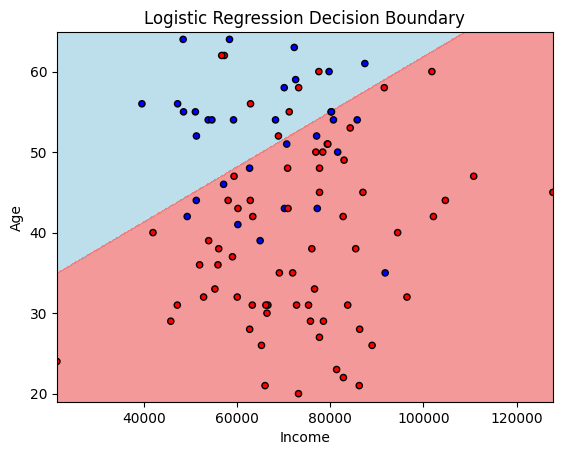

**Explanation:**

This plot will show a visual decision boundary that separates the two classes (purchase = 0 or 1) based on `income` and `age`.

1. **Mesh Grid:** We create a grid of values for `income` and `age` to plot a surface representing the decision boundary.
2. **Countour Plot:** The `plt.contourf` function is used to fill the background of the lot based on the predicted class (0 or 1) at each point on the grid.
3. **Scatter Plot:** The actual data points are plotted on top of the decision boundary using `plt.scatter`, with different colors for each class (purchase = 0 or 1).
4. **Predictions:** The model preditcs the class for each point on the grid(`z`), and we reshape it to match the grid for plotting.